In [2]:
import numpy as np
import pandas as pd
import glob

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm

import bokeh
import bokeh.plotting
from bokeh.plotting import ColumnDataSource
from bokeh.models import LabelSet
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [3]:
#Glob together all csvs with the deeplabcut generated position data
file_list=glob.glob('.\\*\\*.csv')

In [4]:
file_list

['.\\190919\\190919_DCHC_transfer_experiment_S_well_1DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_2DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_3DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_4DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_5DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_6DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_7DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_8DeepCut_resnet50_DCHC_transfer_analysis_20190919_SO

In [5]:
name=file_list[1]
name[name.find('well')+5:name.find('well')+6]

'2'

In [6]:
#create dataframe for metadata
metadata=pd.DataFrame(columns=['well number','species','collection date','file path'])
#list to contain all position dataframes
df_list=[]
for i,name in tqdm(enumerate(file_list)):
    #load each csv as a dataframe into a list
    df_list.append(pd.read_csv(name,header=[1,2]))
    
    #pull metadata out of the filenames (Species identifier, collection date, well number)
    metadata = metadata.append({'species':name[name.rfind('_',0,name.rfind('_'))+1], 
                        'collection date':name[name.find('\\')+1:name.find('\\')+7],
                        'well number':name[name.find('well')+5:name.find('well')+6],
                        'file path' : name}, 
                     ignore_index=True)

#creating columns for the ant length information
metadata['length lower']=''
metadata['length upper']=''

109it [00:19,  6.12it/s]


In [7]:
#loop through the each dataframe and create a new column named antlength
#antlength is the length of the ant calculated from the head and gaster position data
for i,df in tqdm(enumerate(df_list)):
    df['antlength'] = np.sqrt((df['anthead']['x'] - df['antgaster']['x'])**2 + 
                           (df['anthead']['y'] - df['antgaster']['y'])**2)

109it [00:01, 81.29it/s]


In [8]:
#list all dates in the metadata file
np.unique(metadata['collection date'])

array(['190919', '191003', '191008', '191012', '191016', '191019',
       '191020', '191021', '191022', '191025', '191029', '191105',
       '191113', '191115'], dtype=object)

### In the next section the ant lengths from each experiment are plotted in order to determine an upper and lower bound for the length of the ant in each well

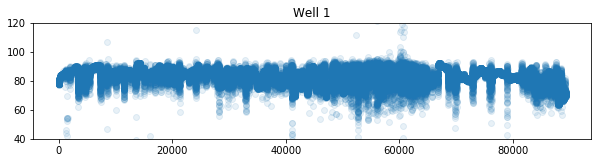

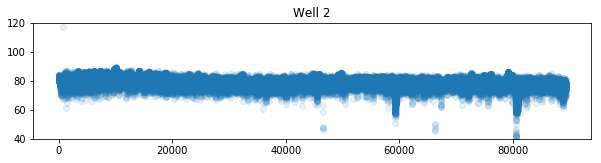

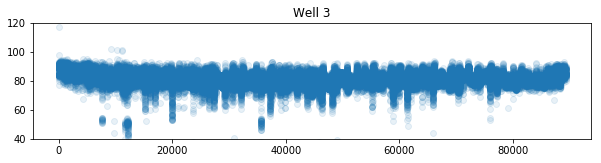

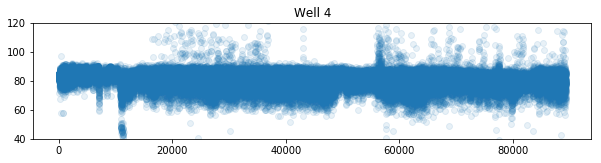

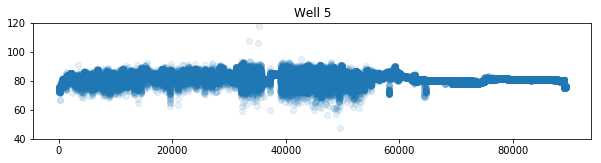

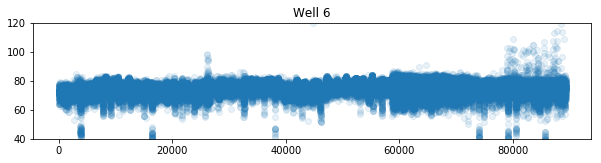

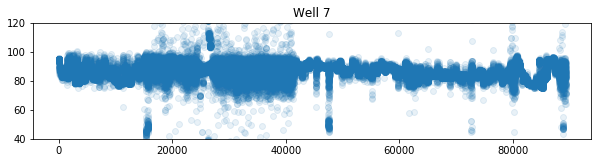

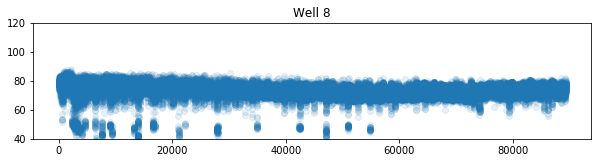

In [9]:
#count is used to specify the position of each subplot
count=0

#date specifies the date of the data collection to be analyzed
date='191105'

#loop through the indices of the rows from the ID dataframe. These indices should match
#up with the position of the corresponding dataframe in the dataframe list.
for i in metadata.loc[metadata['collection date']==date].index:
    df=df_list[i]
    subplt = int(str(len(metadata.loc[metadata['collection date']==date].index)) + '1' + str(count+1))
    plt.figure(figsize=(10,20))
    plt.subplot(subplt)
    plt.title('Well ' + metadata.iloc[i]['well number'])
    plt.scatter(df['bodyparts']['coords'],df['antlength'],alpha=0.1)
    plt.ylim([40,120])
    count = count+1

# Thought
Maybe don't need to have a lower bound. Isn't too big of an issue if either head or gaster is incorrectly labelled so long as it is closer to the other marker than what it should be

In [10]:
metadata['length lower'].loc[metadata['collection date']=='190919'] = 40
metadata['length upper'].loc[metadata['collection date']=='190919'] = 120
metadata['length lower'].loc[metadata['collection date']=='191003'] = 40
metadata['length upper'].loc[metadata['collection date']=='191003'] = 120
metadata['length lower'].loc[metadata['collection date']=='191008'] = 30
metadata['length upper'].loc[metadata['collection date']=='191008'] = 110
metadata['length lower'].loc[metadata['collection date']=='191012'] = 30
metadata['length upper'].loc[metadata['collection date']=='191012'] = 110
metadata['length lower'].loc[metadata['collection date']=='191016'] = 30
metadata['length upper'].loc[metadata['collection date']=='191016'] = 110
metadata['length lower'].loc[metadata['collection date']=='191019'] = 30
metadata['length upper'].loc[metadata['collection date']=='191019'] = 110
metadata['length lower'].loc[metadata['collection date']=='191020'] = 30
metadata['length upper'].loc[metadata['collection date']=='191020'] = 110
metadata['length lower'].loc[metadata['collection date']=='191021'] = 30
metadata['length upper'].loc[metadata['collection date']=='191021'] = 110
metadata['length lower'].loc[metadata['collection date']=='191022'] = 30
metadata['length upper'].loc[metadata['collection date']=='191022'] = 110
metadata['length lower'].loc[metadata['collection date']=='191025'] = 30
metadata['length upper'].loc[metadata['collection date']=='191025'] = 110
metadata['length lower'].loc[metadata['collection date']=='191029'] = 45
metadata['length upper'].loc[metadata['collection date']=='191029'] = 125
metadata['length lower'].loc[metadata['collection date']=='191105'] = 40
metadata['length upper'].loc[metadata['collection date']=='191105'] = 120
metadata['length lower'].loc[metadata['collection date']=='191113'] = 30
metadata['length upper'].loc[metadata['collection date']=='191113'] = 110
metadata['length lower'].loc[metadata['collection date']=='191115'] = 40
metadata['length upper'].loc[metadata['collection date']=='191115'] = 120

C:\Users\Tom\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
metadata.head()

,well number,species,collection date,file path,length lower,length upper
0,1,S,190919,.\190919\190919_DCHC_transfer_experiment_S_wel...,40,120
1,2,S,190919,.\190919\190919_DCHC_transfer_experiment_S_wel...,40,120
2,3,S,190919,.\190919\190919_DCHC_transfer_experiment_S_wel...,40,120
3,4,S,190919,.\190919\190919_DCHC_transfer_experiment_S_wel...,40,120
4,5,S,190919,.\190919\190919_DCHC_transfer_experiment_S_wel...,40,120


In [12]:
for i,df in enumerate(df_list):
    df['good frames'] = (df['antlength'] < metadata.iloc[i]['length upper']) & (df['antlength'] > metadata.iloc[i]['length lower'])  

In [13]:
for i,df in enumerate(df_list):
    avgLen = np.average(df['antlength'].loc[df['good frames']])
    df['touching'] = False

    df['head2head'] = np.sqrt((df['beetlehead']['x'] - df['anthead']['x'])**2 + 
                              (df['beetlehead']['y'] - df['anthead']['y'])**2)
        
    df['head2butt'] = np.sqrt((df['beetlehead']['x'] - df['antgaster']['x'])**2 + 
                              (df['beetlehead']['y'] - df['antgaster']['y'])**2)
    
    if (metadata.iloc[i]['species'] == 'S') | (metadata.iloc[i]['species'] == 'D'):
        df['ellipse distance'] = df['head2head'] + df['head2butt']
        df['touching'] = ((df['antlength']*1.4 > df['ellipse distance'])&df['good frames']) | ((df['head2head']<avgLen) | (df['head2butt']<avgLen))
        
    if metadata.iloc[i]['species'] == 'P':
        df['butt2head'] = np.sqrt((df['beetleabdomen']['x'] - df['anthead']['x'])**2 + 
                              (df['beetleabdomen']['y'] - df['anthead']['y'])**2)
        
        df['butt2butt'] = np.sqrt((df['beetleabdomen']['x'] - df['antgaster']['x'])**2 + 
                              (df['beetleabdomen']['y'] - df['antgaster']['y'])**2)
    
        headEllipse=df['head2head'] + df['head2butt']
        buttEllipse=df['butt2head'] + df['butt2butt']
    
        df['ellipse distance'] = headEllipse*(headEllipse<buttEllipse) + buttEllipse*(buttEllipse<headEllipse)
    
        df['touching'] = ((df['antlength']*1.4 > df['ellipse distance'])&df['good frames']) \
                            | ((df['head2head']<avgLen) | (df['head2butt']<avgLen))\
                            | ((df['butt2head']<avgLen) | (df['butt2butt']<avgLen))

In [14]:
sum(df_list[1]['touching'])

21194

In [15]:
metadata['touching']=''
for i,df in enumerate(df_list):
    metadata['touching'].iloc[i] = (sum(df['touching'])/len(df))

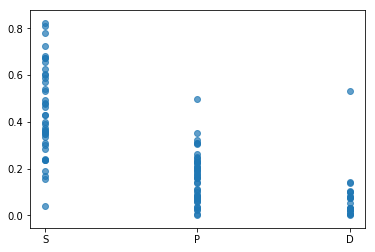

In [16]:
plt.scatter(metadata['species'],metadata['touching'],alpha=0.7)

In [17]:
def ecdf_func(x):
    return np.sort(x), np.arange(len(x))/len(x)

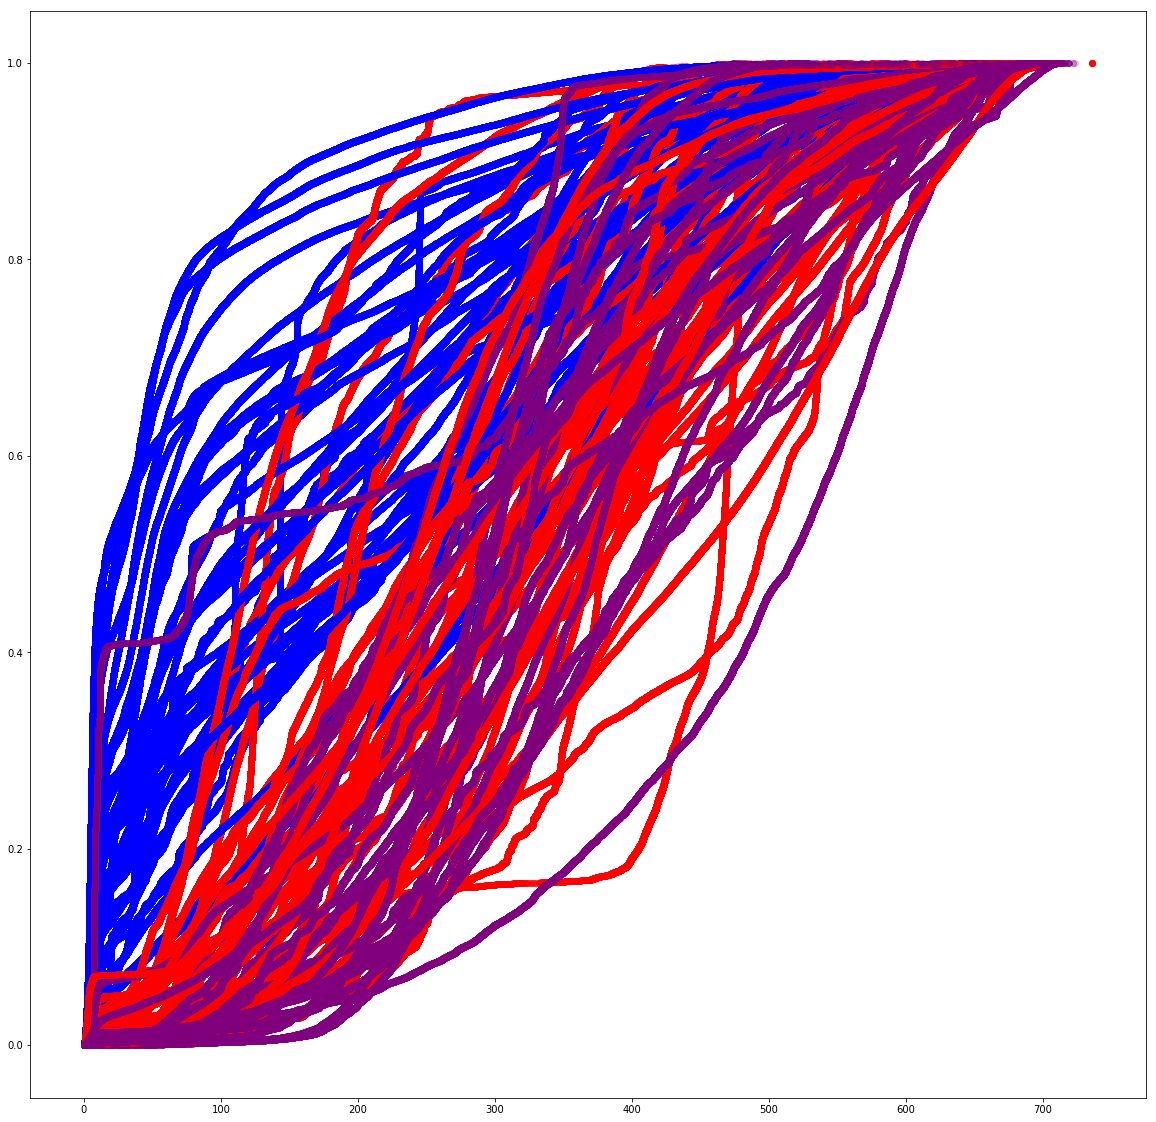

In [20]:
colors=['Red','Orange','Green','Blue','Purple']
plt.figure(figsize=(20,20))
for i,df in enumerate(df_list): 
    if metadata['species'].iloc[i] == 'P':
        color='red'
    if metadata['species'].iloc[i] == 'S':
        color='blue'
    if metadata['species'].iloc[i] == 'D':
        color='purple'
        
    x_val,y_val=ecdf_func(df['head2head'])
    
    plt.scatter(x_val,y_val,color=color,alpha=0.2)